In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [19]:
MNIST = load_digits()

In [20]:
data = MNIST.data
label = MNIST.target

In [21]:
data.shape

(1797, 64)

In [22]:
label.shape

(1797,)

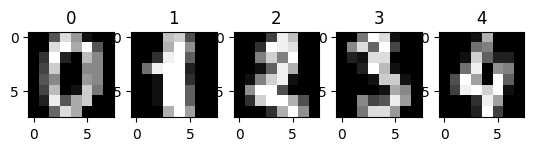

In [23]:
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(np.reshape(data[i], (8,8)), cmap='gray')
  plt.title(label[i])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [26]:
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9861111111111112

In [27]:
param_grid = {'C': [0.01, 0.1, 1, 10], # Regularization
              'gamma': [0.1, 1, 10], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [28]:
# create a SVM classifier
svc = SVC()

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [29]:
# print the best hyperparameters and their corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# evaluate the performance of the best model on the testing set
best_svc = grid_search.best_estimator_
print("Test score: ", best_svc.score(x_test, y_test))

Best parameters:  {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Best score:  0.9888695315524585
Test score:  0.9861111111111112
